In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv",index_col=0)


In [3]:
df.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
satisfaction_level,,,,,,,,,
0.38,0.53,2,157,3,0,0,sales,low,1
0.80,0.86,5,262,6,0,0,sales,medium,1
0.11,0.88,7,272,4,0,0,sales,medium,1
0.72,0.87,5,223,5,0,0,sales,low,1
0.37,0.52,2,159,3,0,0,sales,low,1


In [3]:
from sklearn.preprocessing import StandardScaler


In [6]:
# sales (column name) better be called department
print(df['sales'].value_counts())
print(df['salary'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [10]:
df2 = pd.get_dummies(df, columns=['sales','salary'], drop_first=True)
df2.head(2)

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
satisfaction_level,,,,,,,,,,,,,,,,,,
0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [21]:
X = df2.drop('left',axis=1)
y = df2['left']
print(X.shape)
print(y.shape)

(14999, 17)
(14999,)


In [11]:
scaler = StandardScaler()


In [22]:
scaler.fit(df.drop('left',axis=1))


ValueError: could not convert string to float: 'low'

In [23]:
scaled_features = scaler.transform(df.drop('left',axis=1))



NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [24]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

NameError: name 'scaled_features' is not defined

In [25]:
from sklearn.model_selection import train_test_split


In [26]:

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['left'],
                                                    test_size=0.30)

NameError: name 'scaled_features' is not defined

In [27]:
from sklearn.neighbors import KNeighborsClassifier


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)


In [29]:
knn.fit(X_train,y_train)


NameError: name 'X_train' is not defined

In [30]:
pred = knn.predict(X_test)


NameError: name 'X_test' is not defined

In [31]:
from sklearn.metrics import classification_report,confusion_matrix


In [32]:
print(confusion_matrix(y_test,pred))


NameError: name 'y_test' is not defined

In [33]:
print(classification_report(y_test,pred))


NameError: name 'y_test' is not defined

In [34]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

NameError: name 'X_train' is not defined

ValueError: x and y must have same first dimension, but have shapes (39,) and (0,)

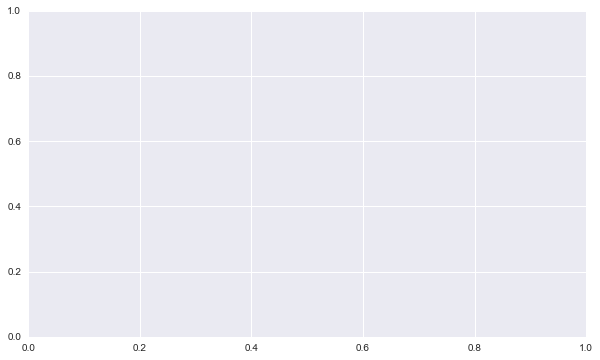

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

NameError: name 'X_train' is not defined

In [37]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


NameError: name 'X_train' is not defined